# Import Necessary Libraries

In [34]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Explore Dataset

In [3]:
df = pd.read_csv('Maritime disasters of the 20th century.csv', index_col=0)

In [4]:
df

,The year of the disaster,The country ship belongs to,The name of the ship,Number of deaths
0,1987,Philippines,Dona Paz,4386
1,1948,China,Kiangya,2750
2,1917,Canada,Mont Blanc,1950
3,1912,UK,RMS Titanic,1517
4,1949,China,Taiping,1500
...,...,...,...,...
158,1975,USA,SS Edmund Fitzgerald,29
159,1978,Germany,MS Munchen,28
160,1981,Israel,The Mezada,24
161,1948,Malta,NaN,23


# Data Preprocessing

In [5]:
# Create a New Interval Column
df['Interval'] = (10 * (df['The year of the disaster'] // 10)).astype(str) + 's'

In [6]:
df.dtypes

The year of the disaster        int64
The country ship belongs to    object
The name of the ship           object
Number of deaths                int64
Interval                       object
dtype: object

In [7]:
df.head(5)

,The year of the disaster,The country ship belongs to,The name of the ship,Number of deaths,Interval
0,1987,Philippines,Dona Paz,4386,1980s
1,1948,China,Kiangya,2750,1940s
2,1917,Canada,Mont Blanc,1950,1910s
3,1912,UK,RMS Titanic,1517,1910s
4,1949,China,Taiping,1500,1940s


<AxesSubplot:>

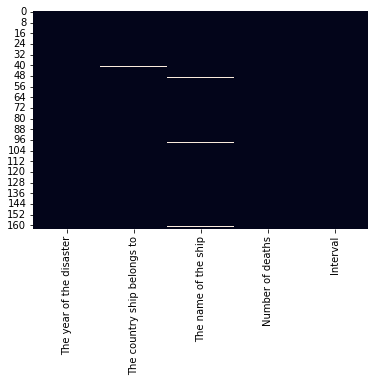

In [8]:
# Plot to see null values in our data
sns.heatmap(df.isnull(), cbar=False)

In [9]:
# Null Value Percentage Per column
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
The year of the disaster,The year of the disaster,0.000000
The country ship belongs to,The country ship belongs to,0.613497
The name of the ship,The name of the ship,1.840491
Number of deaths,Number of deaths,0.000000
Interval,Interval,0.000000


In [10]:
df.to_csv('FINAL.csv')

# EDA

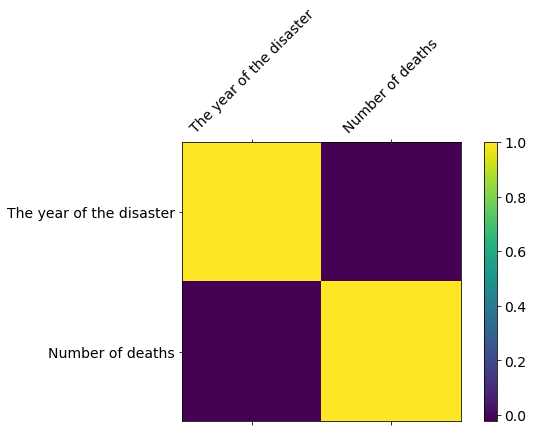

In [11]:
# plot correlation matrix of numeric variables
f = plt.figure(figsize=(8,5))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

In [12]:
data = df
cad = data[['The country ship belongs to','Number of deaths']].groupby(['The country ship belongs to']).sum().reset_index().sort_values('Number of deaths', ascending = False)

In [13]:
cad.head(5)

,The country ship belongs to,Number of deaths
30,Philippines,5520
43,UK,5314
44,USA,5062
6,China,4996
21,Japan,3744


Text(0.5, 1.0, 'Total Number of deaths with respect to Countries')

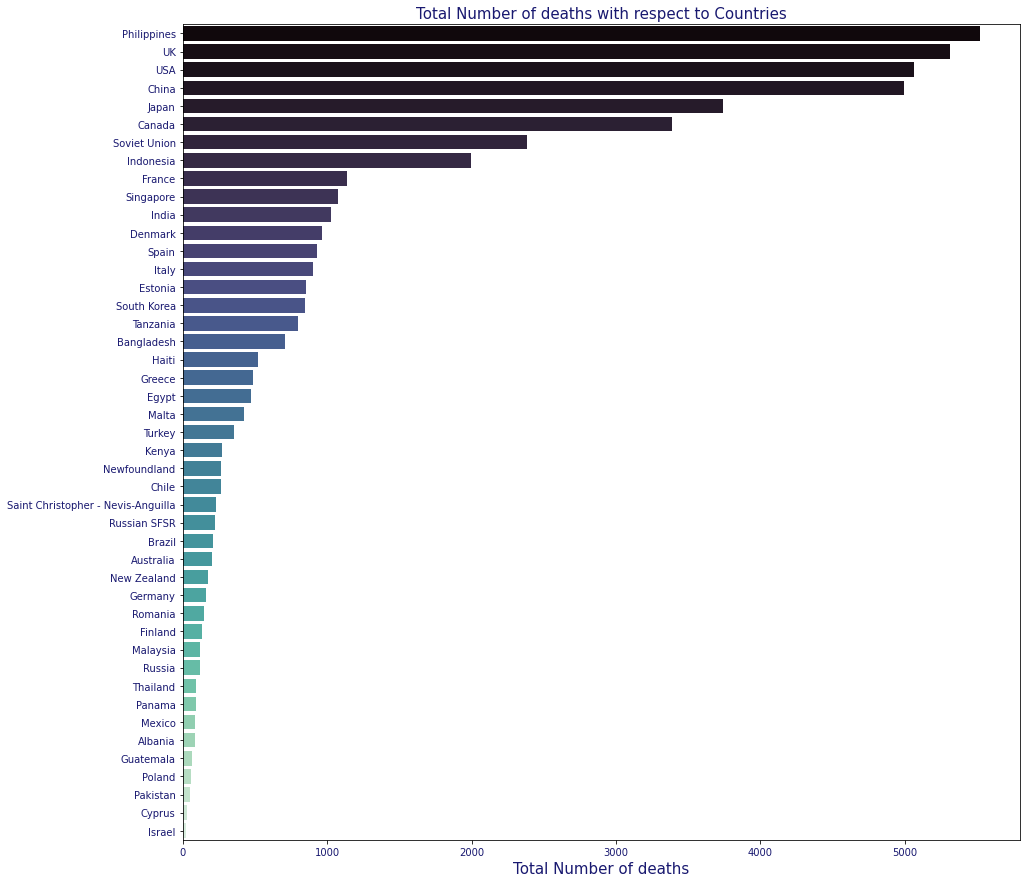

In [14]:
plt.figure(figsize = (15,15))
sns.barplot(y = 'The country ship belongs to', x = 'Number of deaths', data = cad, palette = 'mako')
plt.xlabel('Total Number of deaths', size = 15, color='midnightblue')
plt.ylabel('')
plt.xticks(color='midnightblue')
plt.yticks(color='midnightblue')
plt.title('Total Number of deaths with respect to Countries', size = 15, color='midnightblue')

In [15]:
df.head(5)

,The year of the disaster,The country ship belongs to,The name of the ship,Number of deaths,Interval
0,1987,Philippines,Dona Paz,4386,1980s
1,1948,China,Kiangya,2750,1940s
2,1917,Canada,Mont Blanc,1950,1910s
3,1912,UK,RMS Titanic,1517,1910s
4,1949,China,Taiping,1500,1940s


In [16]:
data = df
IAD = data[['Interval','Number of deaths']].groupby(['Interval']).sum().reset_index().sort_values('Number of deaths', ascending = False)

In [17]:
IAD

,Interval,Number of deaths
1,1910s,9613
8,1980s,8413
4,1940s,5878
9,1990s,5725
0,1900s,5053
2,1920s,4536
5,1950s,3564
7,1970s,1481
6,1960s,1194
3,1930s,1176


Text(0.5, 1.0, 'Total Number of deaths in respective Decade')

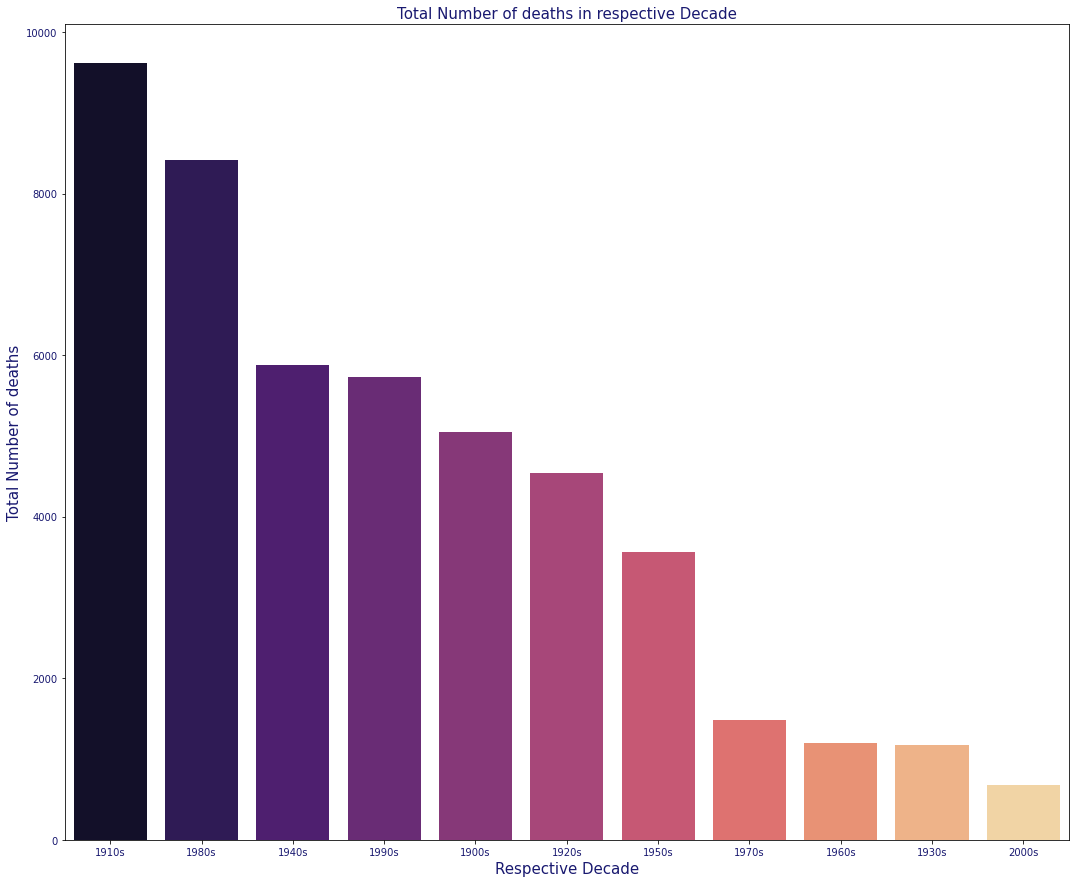

In [18]:
plt.figure(figsize = (18,15))
sns.barplot(y = 'Number of deaths', x = 'Interval', data = IAD, palette = 'magma')
plt.xlabel('Respective Decade', size = 15, color='midnightblue')
plt.ylabel('Total Number of deaths', size = 15, color='midnightblue')
plt.xticks(color='midnightblue')
plt.yticks(color='midnightblue')
plt.title('Total Number of deaths in respective Decade', size = 15, color='midnightblue')

In [19]:
for elem in df['The name of the ship'].unique():
    print(elem)

Dona Paz
Kiangya
Mont Blanc
RMS Titanic
Taiping
Toya Maru
RMS Empress of Ireland
General Slocum
Kiche Maru
Hong Moh
Wusung
Estonia
Eastland
Bukoba
Indigirka
Camorta
HMS Bulwark
Norge
Ramdas
Novorossiysk
Grandcamp
Tamponas II
SS Afrique
Ferry Neptune
Shamia
Valbanera
Cahaya Bahari
Salem Express
Principe de Asturias
Hongxing 245/240
Admiral Nakhimov
Unnamed passenger ship
Dona Marilyn
KM Bismas Raya 2
Princess Sophia
Namyoung-ho
Yoshino
Principessa Mafalda
Dashun
Harta Rimba
Liberte
Sobral Santos ll
Sirio
Seohae Ferry
F174
Uskudar
Likoni Ferry
Angamos
Gurita
nan
Dara
Heraklion
MV Christena
Changgyeong
Sovnarkom
Aquidaba
Waratah
Matsushima
Iolaire
Haisal
Herald of Free Enterprise
Aleksandr Suvorov
Don Juan
USS Hobson
Southern Cross
Shiun Maru
Scandinavian Star
Princess of the Orient
Larchmont
Koombana
Mogosoaia
Majakovskis Riga
Cebu City
Moby Prince
Morro Castle
Kuru
City of Rio de Janeiro
Princess Victoria
Pamir
Volturno
USS Thresher
TSMS Lakonia
Berlin
Hilda
Yongala
Pulau Kidjang
Iena
S

In [20]:
data = df
SAD = data[['The name of the ship','Number of deaths']].groupby(['The name of the ship']).sum().reset_index().sort_values('Number of deaths', ascending = False)

In [21]:
SAD.head(5)

,The name of the ship,Number of deaths
27,Dona Paz,4386
70,Kiangya,2750
90,Mont Blanc,1950
107,RMS Titanic,1517
132,Taiping,1500


Text(0.5, 1.0, 'Total Number of deaths against Top 30 Ships')

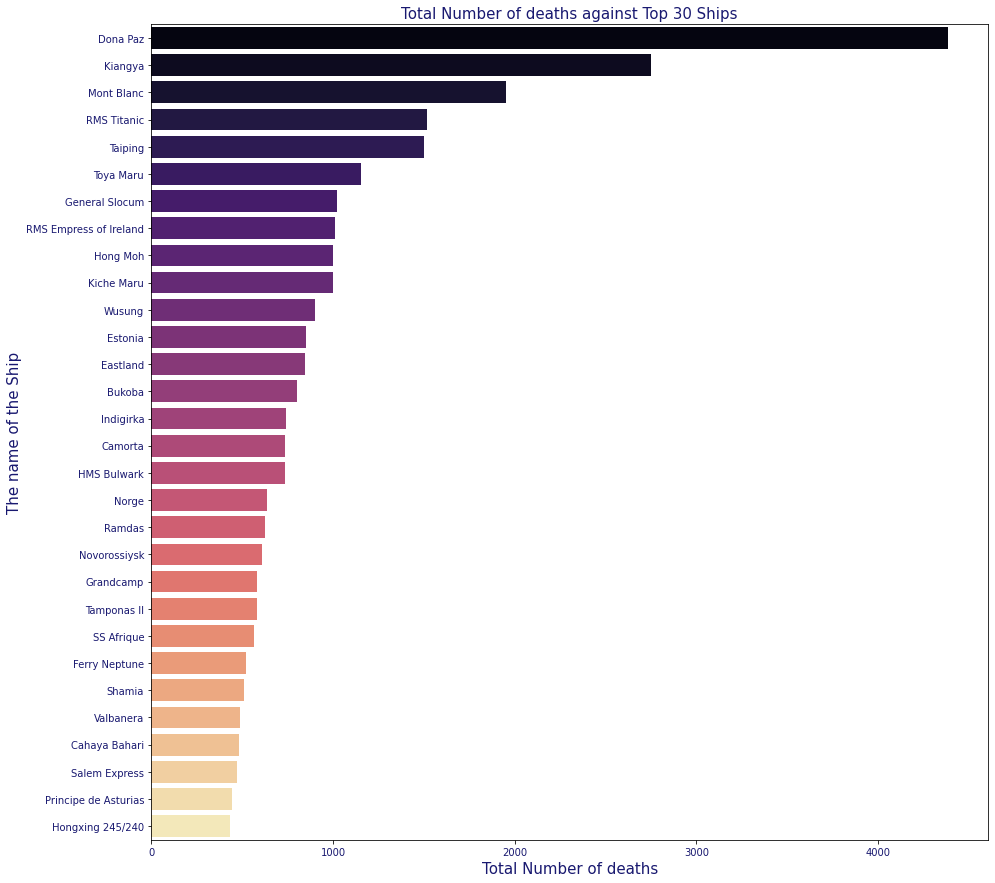

In [22]:
plt.figure(figsize = (15,15))
sns.barplot(y = 'The name of the ship', x = 'Number of deaths', data = SAD.nlargest(30, 'Number of deaths'), palette = 'magma')
plt.xlabel('Total Number of deaths', size = 15, color='midnightblue')
plt.ylabel('The name of the Ship', size = 15, color='midnightblue')
plt.xticks(color='midnightblue')
plt.yticks(color='midnightblue')
plt.title('Total Number of deaths against Top 30 Ships', size = 15, color='midnightblue')

# PART TWO MAPS

In [23]:
df = pd.read_csv('./FINAL.csv', index_col=0)

In [24]:
df = df.rename(columns={'The country ship belongs to': 'Country'})

In [25]:
df = df.rename(columns={'Number of deaths': 'Number_of_Deaths'})

In [26]:
df.head(5)

,The year of the disaster,Country,The name of the ship,Number_of_Deaths,Interval
0,1987,Philippines,Dona Paz,4386,1980s
1,1948,China,Kiangya,2750,1940s
2,1917,Canada,Mont Blanc,1950,1910s
3,1912,UK,RMS Titanic,1517,1910s
4,1949,China,Taiping,1500,1940s


In [27]:
df.loc[ df["Country"] == "UK", "Country"] = "United Kingdom"

In [28]:
df.loc[ df["Country"] == "USA", "Country"] = "United States"

In [29]:
df.head(10)

,The year of the disaster,Country,The name of the ship,Number_of_Deaths,Interval
0,1987,Philippines,Dona Paz,4386,1980s
1,1948,China,Kiangya,2750,1940s
2,1917,Canada,Mont Blanc,1950,1910s
3,1912,United Kingdom,RMS Titanic,1517,1910s
4,1949,China,Taiping,1500,1940s
5,1954,Japan,Toya Maru,1153,1950s
6,1914,Canada,RMS Empress of Ireland,1012,1910s
7,1904,United States,General Slocum,1021,1900s
8,1912,Japan,Kiche Maru,1000,1910s
9,1921,Singapore,Hong Moh,1000,1920s


In [30]:
import pycountry 
def alpha3code(column):
    CODE=[]
    for country in column:
        try:
            code=pycountry.countries.get(name=country).alpha_3
           # .alpha_3 means 3-letter country code 
           # .alpha_2 means 2-letter country code
            CODE.append(code)
        except:
            CODE.append('None')
    return CODE
# create a column for code 
df['CODE']=alpha3code(df.Country)
df.head(5)

,The year of the disaster,Country,The name of the ship,Number_of_Deaths,Interval,CODE
0,1987,Philippines,Dona Paz,4386,1980s,PHL
1,1948,China,Kiangya,2750,1940s,CHN
2,1917,Canada,Mont Blanc,1950,1910s,CAN
3,1912,United Kingdom,RMS Titanic,1517,1910s,GBR
4,1949,China,Taiping,1500,1940s,CHN


### **Reference:** https://melaniesoek0120.medium.com/data-visualization-how-to-plot-a-map-with-geopandas-in-python-73b10dcd4b4b|

In [ ]:
"""import geopandas
# 'naturalearth_lowres' is geopandas datasets so we can use it directly
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
# rename the columns so that we can merge with our data
world.columns=['pop_est', 'continent', 'name', 'CODE', 'gdp_md_est', 'geometry']
# then merge with our data 
merge=pd.merge(world,df,on='CODE')

location=pd.read_csv('https://raw.githubusercontent.com/melanieshi0120/COVID-19_global_time_series_panel_data/master/data/countries_latitude_longitude.csv')"""

In [38]:
merge = pd.read_csv('Final_Map.csv', index_col=0)

In [39]:
merge

,index,pop_est,continent,name,CODE,gdp_md_est,geometry,The year of the disaster,Country,The name of the ship,Number_of_Deaths,Interval,latitude,longitude
0,115,104256076,Asia,Philippines,PHL,801900.0,MULTIPOLYGON (((120.8338961121466 12.704496161...,1987,Philippines,Dona Paz,4386,1980s,12.879721,121.774017
1,76,1379302771,Asia,China,CHN,21140000.0,MULTIPOLYGON (((109.4752095886636 18.197700913...,1948,China,Kiangya,2750,1940s,35.861660,104.195397
2,0,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84 49.00000000000011, -12...",1917,Canada,Mont Blanc,1950,1910s,56.130366,-106.346771
3,89,64769452,Europe,United Kingdom,GBR,2788000.0,MULTIPOLYGON (((-6.197884894220991 53.86756500...,1912,United Kingdom,RMS Titanic,1517,1910s,55.378051,-3.435973
4,77,1379302771,Asia,China,CHN,21140000.0,MULTIPOLYGON (((109.4752095886636 18.197700913...,1949,China,Taiping,1500,1940s,35.861660,104.195397
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,132,1221549,Asia,Cyprus,CYP,29260.0,"POLYGON ((32.73178022637745 35.14002594658844,...",1992,Cyprus,Royal Pacific,30,1990s,35.126413,33.429859
130,114,64769452,Europe,United Kingdom,GBR,2788000.0,MULTIPOLYGON (((-6.197884894220991 53.86756500...,1916,United Kingdom,HMHS Britannic,30,1910s,55.378051,-3.435973
131,37,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84 49.00000000000011, -12...",1975,United States,SS Edmund Fitzgerald,29,1970s,37.090240,-95.712891
132,61,80594017,Europe,Germany,DEU,3979000.0,"POLYGON ((14.11968631354256 53.75702912049104,...",1978,Germany,MS Munchen,28,1970s,51.165691,10.451526


In [ ]:
"""merge.to_csv('Final_Map.csv')"""

In [ ]:
"""merge.plot(column='Number_of_Deaths', scheme="quantiles",
           figsize=(25, 20),
           legend=True,cmap='coolwarm')
plt.title('Maritime disaster deaths in different countries',fontsize=25)
# add countries names and number of deaths 
for i in range(0,10):
    plt.text(float(merge.longitude[i]),float(merge.latitude[i]),str(merge.Country[i]),size=10)
plt.show()"""

In [69]:
import plotly.express as px
fig = px.scatter_geo(merge, locations="CODE", color="Country",
                     hover_name="Country", size="Number_of_Deaths",
                     projection="natural earth", size_max = 35, template = 'plotly_dark')
fig.show()